# ECON 0150 | Replication Notebook

**Title:** Major and Income

**Original Authors:** Iskandarani; Chau

**Original Date:** Fall 2025

---

This notebook replicates the analysis from a student final project in ECON 0150: Economic Data Analysis.

## About This Replication

**Research Question:** Does undergraduate major impact income?

**Data Source:** IPUMS American Community Survey (2023) - 1 million person sample

**Methods:** OLS regression with categorical major variable and controls for age and education level

**Main Finding:** Major significantly predicts income. Engineering (coef = 3.68) and Physical Sciences (coef = 3.63) have highest log income premiums compared to no degree, while Fine Arts (coef = 2.86) shows lowest. Model R² = 0.54.

**Course Concepts Used:**
- Categorical (dummy) variables
- Log transformation of income
- OLS regression with multiple predictors
- Interpreting coefficients relative to baseline

---
## Step 0 | Setup

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
# Load data from course website
# Note: This is a large file (97MB, 1 million observations)
base_url = 'https://tayweid.github.io/econ-0150/projects/replications/0020/data/'

df = pd.read_csv(base_url + 'usa_00046_sample.csv', index_col=0)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,SEX,AGE,EDUC,EDUCD,DEGFIELD,DEGFIELDD,INCTOT
227737,2023,202301,111656,2023000161045,13.0,2023001116561,990306,1,2,13.0,1,79,3,30,0,0,69000
1118936,2023,202301,490206,2023000920892,70.0,2023004902061,970117,1,3,48.0,2,21,7,71,0,0,100
3191994,2023,202301,1423500,2023000679721,377.0,2023014235001,7700151,1,1,376.0,2,22,7,71,0,0,3000
1243943,2023,202301,546550,2023000337976,201.0,2023005465501,10019,1,1,200.0,2,66,10,101,23,2304,14800
2192341,2023,202301,975881,2023001435318,34.0,2023009758811,80036,1,2,40.0,1,59,8,81,0,0,120000


---
## Step 1 | Data Preparation

In [5]:
# Major field codes mapping
degfield_map = {
    0: "N/A (No Degree)",
    11: "Agriculture",
    13: "Environment & Natural Resources",
    14: "Architecture",
    15: "Area & Ethnic Studies",
    19: "Communications",
    20: "Communication Tech",
    21: "Computer & Information Sciences",
    22: "Cosmetology",
    23: "Education Admin & Teaching",
    24: "Engineering",
    25: "Engineering Tech",
    26: "Linguistics & Foreign Languages",
    29: "Family & Consumer Sciences",
    32: "Law",
    33: "English Language & Literature",
    34: "Liberal Arts & Humanities",
    35: "Library Science",
    36: "Biology & Life Sciences",
    37: "Mathematics & Statistics",
    38: "Military Tech",
    40: "Interdisciplinary Studies",
    41: "Physical Fitness & Leisure",
    48: "Philosophy & Religion",
    49: "Theology",
    50: "Physical Sciences",
    51: "Nuclear & Biological Tech",
    52: "Psychology",
    53: "Criminal Justice & Fire",
    54: "Public Affairs & Social Work",
    55: "Social Sciences",
    56: "Construction Services",
    57: "Electrical & Mechanical Tech",
    59: "Transportation Sciences",
    60: "Fine Arts",
    61: "Medical & Health Services",
    62: "Business",
    64: "History"
}

# Add major labels
df['DEGFIELD_LABEL'] = df['DEGFIELD'].map(degfield_map)

In [6]:
# Filter to positive income and create log income
df = df[df['INCTOT'] > 0].copy()
df['logINCTOT'] = np.log(df['INCTOT'])

# Drop missing values
df = df.dropna(subset=['AGE', 'logINCTOT', 'DEGFIELD'])

print(f"Analysis sample: {len(df):,} observations")

Analysis sample: 896,327 observations


---
## Step 2 | Data Exploration

In [9]:
# Average income by major
major_income = df.groupby('DEGFIELD_LABEL')['INCTOT'].mean().sort_values(ascending=False)
print("Mean income by major field:")
print(major_income.apply(lambda x: f"${x:,.0f}"))

Mean income by major field:
DEGFIELD_LABEL
N/A (No Degree)                    $2,422,998
Engineering                          $129,146
Computer & Information Sciences      $121,936
Transportation Sciences              $121,291
Construction Services                $119,887
Biology & Life Sciences              $119,443
Physical Sciences                    $115,129
Social Sciences                      $114,412
Mathematics & Statistics             $111,683
Area & Ethnic Studies                $109,230
History                              $107,141
Business                             $105,636
Engineering Tech                     $101,593
Philosophy & Religion                 $97,268
Architecture                          $97,174
Communications                        $91,275
Agriculture                           $84,647
English Language & Literature         $84,595
Linguistics & Foreign Languages       $84,255
Interdisciplinary Studies             $82,543
Criminal Justice & Fire              

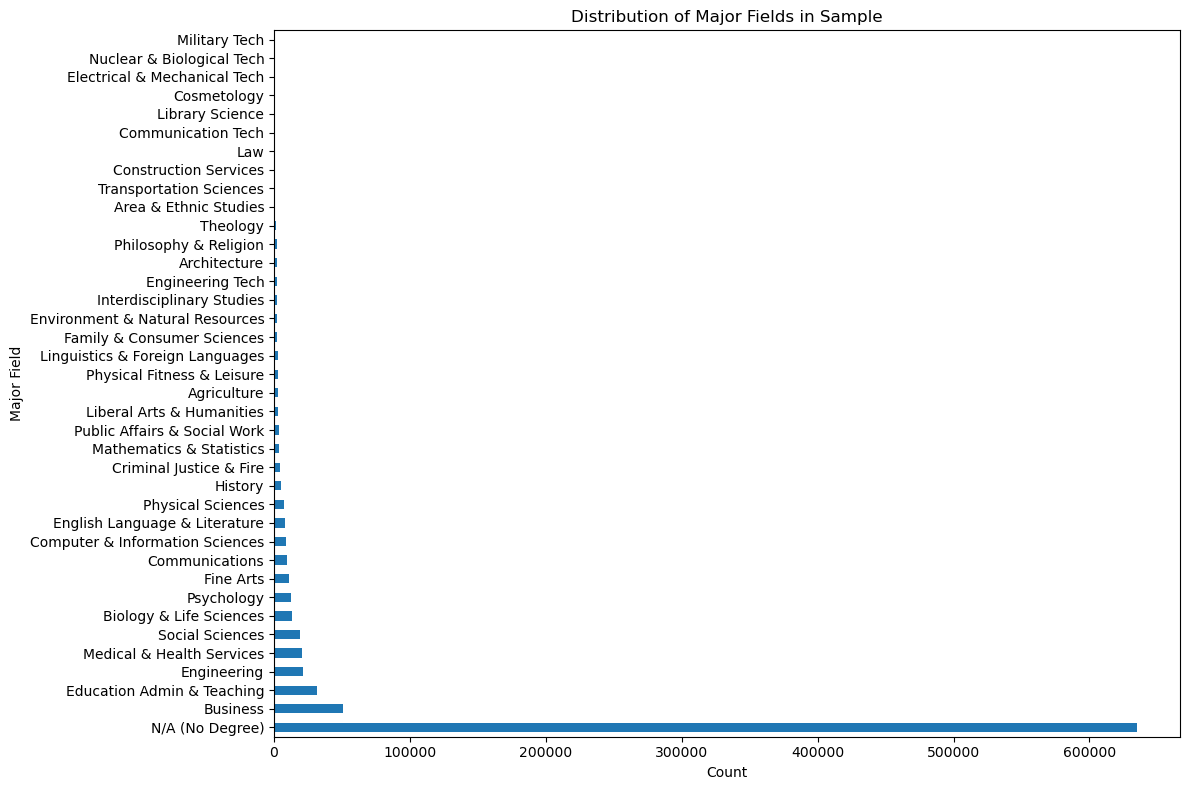

In [10]:
# Distribution of majors
plt.figure(figsize=(12, 8))
major_counts = df['DEGFIELD_LABEL'].value_counts()
major_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Major Field')
plt.title('Distribution of Major Fields in Sample')
plt.tight_layout()
plt.show()

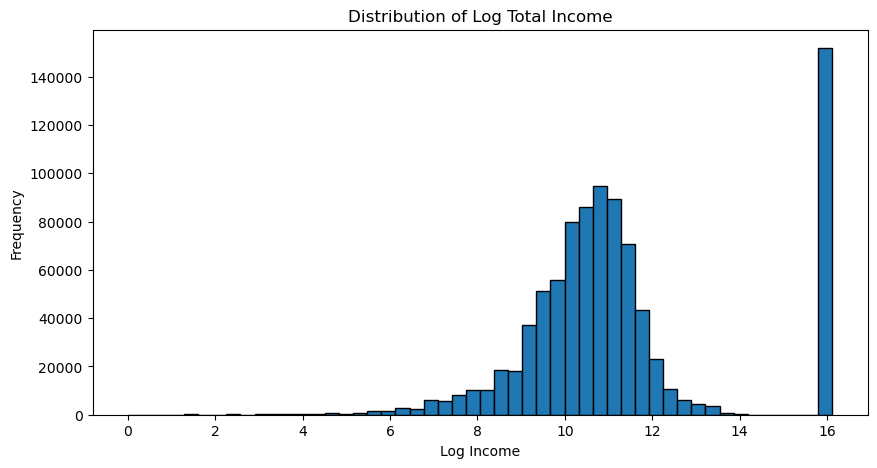

In [11]:
# Log income distribution
plt.figure(figsize=(10, 5))
plt.hist(df['logINCTOT'], bins=50, edgecolor='black')
plt.xlabel('Log Income')
plt.ylabel('Frequency')
plt.title('Distribution of Log Total Income')
plt.show()

---
## Step 3 | Visualization

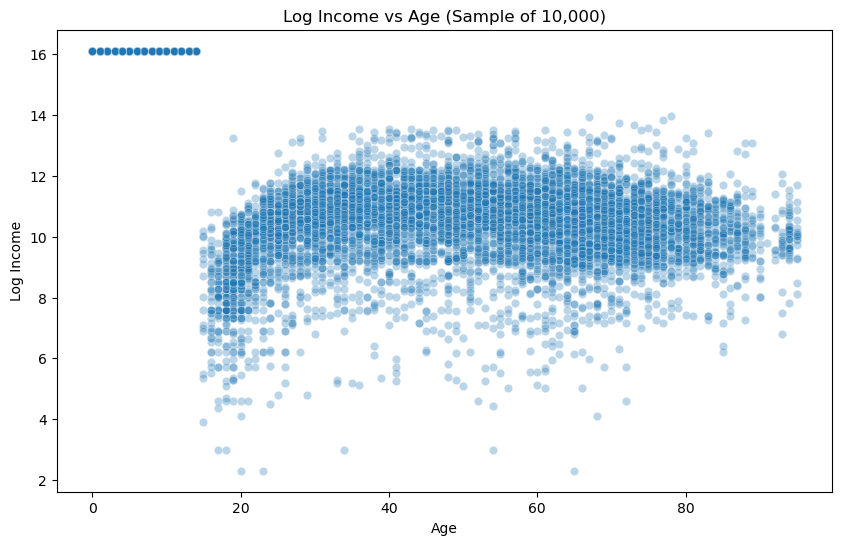

In [12]:
# Income by age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(10000), x='AGE', y='logINCTOT', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Log Income')
plt.title('Log Income vs Age (Sample of 10,000)')
plt.show()

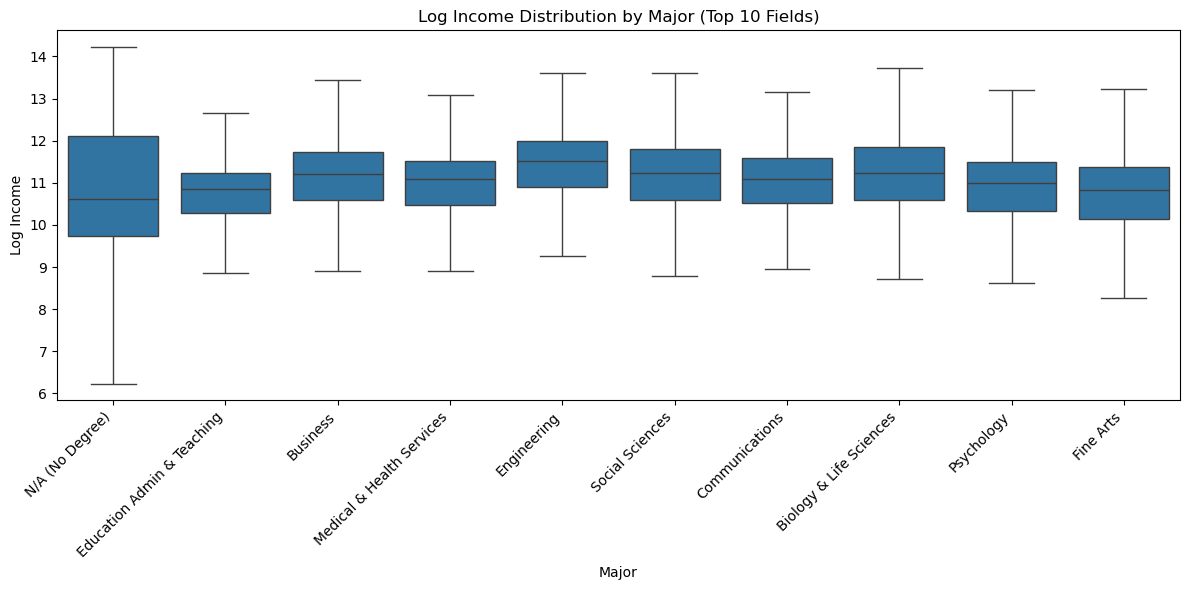

In [13]:
# Box plot of income by major (top 10 majors by count)
top_majors = df['DEGFIELD_LABEL'].value_counts().head(10).index.tolist()
df_top = df[df['DEGFIELD_LABEL'].isin(top_majors)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='DEGFIELD_LABEL', y='logINCTOT', showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Major')
plt.ylabel('Log Income')
plt.title('Log Income Distribution by Major (Top 10 Fields)')
plt.tight_layout()
plt.show()

---
## Step 4 | Statistical Analysis

In [ ]:
# OLS regression with categorical major variable and controls
model = smf.ols('logINCTOT ~ C(DEGFIELD) + AGE + EDUC', data=df).fit()
print(model.summary())

In [ ]:
# Extract major coefficients (excluding baseline)
major_coefs = model.params.filter(like='DEGFIELD')
major_pvals = model.pvalues.filter(like='DEGFIELD')

# Create summary dataframe
coef_summary = pd.DataFrame({
    'Coefficient': major_coefs,
    'P-value': major_pvals
}).sort_values('Coefficient', ascending=False)

print("\nMajor coefficients (relative to no degree baseline):")
print(coef_summary.head(15))

In [ ]:
# Predicted income by major
df['predicted_logINCTOT'] = model.predict(df)

# Average predicted income by major
predicted_by_major = df.groupby('DEGFIELD_LABEL')['predicted_logINCTOT'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
predicted_by_major.plot(kind='barh')
plt.xlabel('Predicted Log Income')
plt.ylabel('Major')
plt.title('Average Predicted Log Income by Major')
plt.tight_layout()
plt.show()

---
## Step 5 | Results Interpretation

### Key Findings

**Model Results (R² = 0.54):**

The regression model explains 54% of the variation in log income using major field, age, and education level.

**Highest Income Majors (log income premium relative to no degree):**
1. Engineering (3.68)
2. Physical Sciences (3.63)
3. Mathematics & Statistics (3.59)
4. History (3.54)
5. Biology & Life Sciences (3.51)

**Lowest Income Majors:**
1. Fine Arts (2.86)
2. Physical Fitness & Leisure (2.83)
3. Family & Consumer Sciences (2.89)

### Interpretation

- All major categories show positive coefficients compared to having no degree
- STEM fields (engineering, physical sciences, math) have the highest income premiums
- The age coefficient is negative (-0.023), suggesting income peaks and then declines
- Education level has a complex relationship (negative coefficient may be due to multicollinearity with major)

### Caveats

- Cross-sectional data cannot establish causation
- Selection effects: who chooses which majors matters
- Occupational sorting explains much of the major-income relationship

---
## Replication Exercises

### Exercise 1: Gender Interaction
Add sex as a control and interaction. Do the income premiums differ by gender for different majors?

### Exercise 2: Age Profiles
Add a squared age term (AGE²) to capture non-linear income-age profiles. How does this change R²?

### Exercise 3: Specific Majors
Focus on comparing just a few majors (e.g., Business vs Engineering vs Education). What's the income gap?

### Challenge Exercise
Research the "major choice" literature in economics. What factors predict major choice, and how does this affect causal interpretation?

In [ ]:
# Your code for exercises
